In [9]:
import pandas as pd
import numpy as np
import lda
from pymystem3 import Mystem
import re

In [10]:
q = ['7233609', '2232329', '263965', '1921128', '7101505', 
     '5946043', '1276570', '5934671', '5703344', '1341977', 
     '5593250', '1962940', '140674', '3034310', '409032', 
     '6627322', '1509362', '724652', '7790172', '3715540', 
     '165961', '1260640', '764248', '777943', '7887504', '262316', 
     '7882480', '5302216', '5023974', '6948079', '7561424', '845064', 
     '167207', '792317', '7865111', '7213502', '7886042', '7527746', 
     '7150668', '3799314', '7850496', '5950876', '7876026', '7881970', '7885360', 
     '438750', '7818912', '880749', '7882486', '7253135', '1587204', '7783106',
     '7884135', '1599895', '7789475', '7883894', '5435261', '7881589', '1626152', 
     '7883260', '7868114', '7537130', '3672656', '1924996', '6521804', '2601271', 
     '7881575', '5379044', '1235281', '1318652', '1116184', '4249098', '7881062', 
     '7843942', '7872131', '5217368', '1093396', '7794488', '293154', '5037104', 
     '103520', '7872527', '7664925', '1231286', '6017680', '3001638', '7876541', 
     '7877160', '7878514', '7867450', '7877644', '5916411', '1498607', '7816754', 
     '5442022', '6172819', '1516432', '1540119', '7873214', '1792662', '7870451', 
     '5981506', '1377490', '7872512', '5639104', '5479931', '7859938', '7589697', 
     '7871569', '7872309', '925093', '5354752', '7865386', '7868567', '7858604', 
     '5560464', '7865022', '6336006', '1510458', '7843101', '7861605', '7862276', 
     '7863815', '7865739', '7864495', '5338133', '7864685', '1346030', '7862557', 
     '7862386', '4186387', '7850927', '1391700', '7849452', '7862035', '7856349', 
     '7861107', '5415720', '7856470', '7850023', '1316352', '7859055', '5324032', 
     '5209020', '7856395', '5338130', '7602365', '5938044', '7836852', '7312678', 
     '1292266', '7853381', '5241718', '7855225', '5172384', '5204630', '4722810', 
     '7853116', '7852935', '7173242', '7852726', '7706105', '7852662', '7846985', 
     '7721253', '7845598', '7851432', '7823650', '7568646', '7650242', '5213621', '6503162', 
     '7842511', '1219712', '7035480', '5915010', '7846055', '7846231', '7845827', '7595905',
     '7711770', '7843497', '7596134', '7842469', '7806359', '7842228', '1744842', '787449', 
     '2062515', '7839619', '7838975', '7838388', '1611133', '7835877', '7815995', '7826887',
     '7811071', '7831010', '7834868', '7325403', '6348903', '7810470', '7831930', '6809623', 
     '5710842', '5977300', '7752862', '6285314', '7739168', '7638308', '197674', '5471306', 
     '7826681', '1535617', '6755630', '7773938', '3278840', '7818983', '7818064', '7824576', 
     '5915351', '7823505', '5605235', '7821679', '7813848', '7811084', '7821291', '6860073',
     '7818760', '7815853', '7784172', '7816549', '7814934', '7744820', '7788251', '7814606', 
     '7811130', '7815732', '3699395', '7809513', '7774795', '7332668', '7811326', '7807031',
     '5527363', '6809960', '7036255', '7810106', '7807687', '5475284', '5298442', '7712962',
     '928429', '7804526', '7804711', '7801015', '7800306', '7792673', '6919681', '7799029', 
     '7776689', '5459476', '7777213', '7558092', '7784715', '7616042', '7789881', '6679884', 
     '7759609', '7788306', '6982697', '7669105', '7783984', '7704499', '7781997', '7773502', 
     '7782133', '7189104', '7775701', '7773576', '7780461', '7769768', '6025285', '4963825', 
     '7754542', '7776603', '7775693', '7174558', '7429630', '7768941', '7631789', '7769855',
     '7706298', '5353321', '7763064', '7347780', '7762649', '6290100', '7766163', '7693438', 
     '7753143', '7758106', '7758383', '7580882', '7010884', '7755747', '7754451', '7759167', 
     '7759049', '7136738', '7584546', '7756048', '7742925', '6440948', '238248', '7712138', 
     '7753266', '7696194', '7752750', '7752297', '7744196', '7750639', '7749918', '7727834', 
     '7747744', '7746693', '7738999', '7746816', '7746551', '7745079', '7746634', '7729849', 
     '6725707', '7743635', '6326456', '7737068', '7725227', '7737132', '7731654', '7719463', 
     '5405132', '2789936', '7176329', '7728387', '7676766', '7728356', '7727347', '7379022', 
     '7010426', '7727143', '7723375', '6625226', '7723617', '7410411', '7434235', '7203379', 
     '7719537', '5608334', '7572763', '7717583', '7722494', '7673135', '7722045', '7718499', 
     '7718947', '4708862', '7424454', '7601854', '7718390', '7681499', '7485294', '7717078', 
     '7276315', '7681052', '7353604', '7381314', '7473476', '7494887', '6900221', '7447263', 
     '7707127', '7631267', '7485935', '7485473', '7123215', '7503855', '7501714', '7531906', 
     '7580149', '7537795', '5914377', '7588454', '7615927', '7433178', '7549009', '7630831', 
     '7697305', '7693034', '7706520', '6665537', '7135714', '7713419', '6599524', '7711548', 
     '7711940', '7634596', '7674710', '7709112', '7710582', '6640535', '1790625', '7606802', 
     '7676517', '7709750', '5445275', '7355205', '7526101', '7366403', '7568124', '7589135', 
     '7588348', '5275405', '7266071', '6557929', '7709397', '7701606', '6660722', '7556836', 
     '7015485', '6502863', '2063819', '7700512', '5299989', '7407914', '7703511', '7703887', 
     '7701220', '6080819', '7701978', '5483526', '7697045', '7700589', '7699247', '7680250', 
     '7690773', '7347386', '7650581', '5390313', '7689131', '7678844', '5476939', '7686717', 
     '7691374', '7678344', '7686954', '7570924', '7673309', '7684999', '1545444', '7679959', 
     '7576843', '7280556', '6599297', '5416057', '7682583', '7679855', '7645427', '7667799', 
     '7646121', '6878758', '3457992', '7304934', '7676505', '7644032', '7676909', '7675487', 
     '7670244', '7673505', '7656893', '7668264', '7664763', '7669912', '7445237', '7667443', 
     '7665229', '7578139', '6616315', '7664069', '7662963', '7659038', '7660878', '7656310', 
     '7652981', '7656986', '7155661', '6883986', '1265848', '6523533', '7648824', '7502908', 
     '7652292', '5160325', '5704085', '7651491', '6637081', '7648025', '7623385', '7647315', 
     '7631193', '7342906', '7646118', '7634187', '6696958', '3417637', '7635756', '7617547', 
     '7626327', '7315533', '6424642', '7639192', '7639438', '7638869', '7636010', '7633223', 
     '7245970', '7634439', '7635757', '7632959', '7634660', '7634149', '7597492', '7596890', 
     '7603270', '7597513', '7629105', '4701360', '7626152', '7622090', '7546641', '1790461', 
     '7616716', '7618622', '7610210', '7219113', '7605885', '7610509', '7606546', '7211823', 
     '7608365', '7601306', '7574199', '7611875', '7569562', '5440062', '6973416', '5642320', 
     '7610393', '7608380', '7610163', '7372290', '7431572', '7489032', '7602912', '6642401', 
     '6766039', '7565745', '7589667', '7602703', '7237468', '350585', '7596779', '7601832', 
     '7598362', '6362015', '7600051', '7599642', '7598392', '7584566', '7598981', '7598868', 
     '7598833', '7598402', '6288270', '5475483', '7325061', '7596277', '7595722', '7365874', 
     '7552393', '7592286', '7588953', '7590660', '6014796', '7588868', '7562079', '7586077', 
     '7586109', '7556438', '6658039', '7574719', '7469729', '7420275', '7053748', '7581924', 
     '7203942', '7581731', '7577546', '7564231', '6051350', '7576551', '7576817', '2242123', 
     '7577068', '5481685', '7576163', '7575416', '7563425', '7574760', '7574183', '7571701', 
     '7573240', '7568611', '6216710', '7329363', '7571589', '7571574', '6673131', '7478468', '7530558', '7510172', '7564459', '53080', '7565851', '7565772', '7558887', '7562859', '7539821', '7106290', '7456289', '7439250', '6441900', '7553880', '7494537', '7557259', '7149035', '7384498', '5905660', '7467659', '7289710', '6276153', '7551292', '7549907', '7550017', '7547494', '7547969', '7544204', '7547475', '7546054', '7546818', '6350156', '7471986', '7545274', '7541539', '7447035', '7542339', '7460939', '7469386', '4105547', '7539193', '7538080', '7443499', '7499052', '7512716', '7529081', '7488912', '7531530', '7530677', '5497752', '7527956', '7476608', '7500942', '7515574', '5543906', '7104018', '7444461', '7418483', '7524239', '6532380', '7523827', '5493397', '6697060', '6566752', '6381654', '7517166', '7518214', '7516517', '7513319', '5227734', '5901993', '7508177', '7508922', '7483841', '7503808', '7505591', '5900263', '6677135', '7488467', '7501442', '7399213', '5701154', '7398569', '5329874', '7501194', '7463368', '7499424', '7499902', '7499451', '7472205', '7498477', '7460511', '7488946', '7481706', '7492987', '6258471', '7492553', '7489447', '7420454', '7488658', '7357449', '7486830', '7482091', '7399081', '7441412', '7381937', '7236095', '7480650', '6129313', '6039330', '7350779', '1574738', '7467729', '7479567', '7478019', '7206381', '7478201', '5485118', '7136401', '7476774', '7476257', '7469105', '7395982', '7469215', '5304175', '7286438', '7464240', '7031592', '7459248', '6681847', '4812943', '5745745', '5538629', '7349870', '7388339', '7461230', '7456187', '7420966', '7459276', '7385164', '7248526', '7392295', '7243741', '7455929', '5416030', '7452583', '7453731', '7397645', '7452128', '7451648', '7443930', '7449935', '7444732', '6254825', '7191408', '7444216', '7442212', '7403116', '7083159', '7441917', '7403937', '7414902', '6683292', '7404423', '7434468', '7409302', '7431444', '7436259', '7420077', '7434199', '7432150', '5991096', '7418201', '7427837', '7429245', '6071556', '7426235', '6892967', '7424557', '7422976', '7422024', '7419722', '7386877', '7384823', '7417072', '7392548', '5891285', '7412957', '7408066', '7411244', '7410168', '7405610', '5743725', '7404158', '7403162', '7400938', '7397528', '7401760', '7003644', '7222692', '7396845', '6884204', '7259935', '7080305', '6999716', '7394529', '7392500', '7389188', '7389062', '7390341', '7308297', '7389553', '104478', '7386745', '7387695', '6895573', '7383411', '6906224', '7295459', '7384226', '5711539', '7382964', '7365207', '7382418', '5734267', '7379857', '7256622', '7380755', '7116937', '7271033', '7379031', '7377582', '7378071', '7361337', '7374582', '7374570', '7374076', '7364109', '7371083', '7369886', '7359455', '7368449', '7365180', '7362828', '7365920', '5921273', '7364108', '7363902', '7364110', '7350859', '1899573', '6909916', '7363816', '5657829', '7358603', '7357525', '7111880', '7270206', '7360594', '7346115', '7358959', '7358083', '7334894', '5460815', '5788958', '7176147', '7339588', '7353699', '7354240', '7353690', '7353460', '6933760', '7344134', '7350035', '7198395', '7346164', '7349651', '7312492', '7346550', '7346925', '7342228', '7347875', '7345838', '7295842', '7071248', '7344516', '7010036', '6824866', '7248470', '6659651', '7339440', '7340812', '7340995', '6810380', '7339996', '7335598', '6858920', '7330664', '7338130', '7070090', '7335726', '5488745', '7274847', '5269126', '7215903', '5524220', '7325972', '7244331', '7180595', '7181219', '7146566', '7167672', '7330024', '6717971', '7209783', '7237392', '6757941', '7171196', '6144746', '7210312', '7245431', '6782919', '5433446', '7273233', '7274603', '7320734', '7313111', '7326559', '6931291', '7329107', '7328896', '5289640', '7327703', '7144643', '7325085', '7326479', '7325381', '7326080', '7324939', '7324341', '7279320', '5805003', '7138347', '7317296', '5744212', '7241094', '7317364', '7320000', '7317689', '7219414', '6320748', '6736667', '7316695', '7315673', '7315326', '6243229', '7303185', '7310158', '7310687', '7304299', '7140211', '7309610', '7296984', '7308982', '7171567', '7297949', '6980931', '6254444', '1987078', '7246520', '7294060', '7274788', '7302079', '7266586', '7300812', '7264601', '6913223', '7248252', '7284253', '7289302', '7299188', '7297484', '7298329', '7168862', '7250488', '6970628', '7294565', '7145344', '7282375', '7293172', '6845576', '7292266', '7286794', '6878555', '7256518', '7287511', '7266373', '7276471', '6163387', '7196280', '7283560', '7216233', '7277755', '7281073', '6837530', '6907510', '6834340', '7249275', '6848058', '6969216', '7228971', '7230540', '6888582', '6833908', '6999277', '5618627', '7202812', '7272032', '6341643', '6941513', '6892303', '6945838', '6936225', '6798893', '6655808', '6667748', '6876301', '6786796', '6808689', '7270892', '7241405', '6426002', '7260653', '7248118', '7261363', '7263780', '7264033', '6723695', '7262717', '1240887', '7261141', '7186161', '7258772', '1546767', '7248913', '7201489', '7250699', '7240164', '7237652', '7243117', '7247787', '7240280', '7240296', '7243512', '7230380', '6899091', '7196958', '5950191', '7225827', '7242805', '7241316', '7239219', '7200544', '7018978', '7225552', '7209623', '7196543', '7235395', '7210432', '7184315', '7219578', '7176945', '7225112', '7211738', '6943564', '7140318', '7194864', '7209640', '7207443', '7213849', '7213531', '7171417', '7214115', '7213662', '7207987', '7209820', '7209425', '5470621', '7202213', '7208076', '7197839', '7205295', '7201604', '7165708', '6654584', '5621147', '6641207', '7138257', '6793265', '7127632', '7200202', '7197510', '7138552', '6648527', '7101755', '7192431', '7194905', '6558872', '1663645', '7159038', '7191969', '7180026', '7190785', '6737865', '6653205', '7187515', '7170193', '7184934', '7185153', '5434634', '7183971', '7161750', '7179000', '7178406', '5606426', '7170710', '7175177', '7146083', '7159096', '7119332', '2741141', '7157939', '7133649', '7138541', '7168331', '5957211', '7167589', '7165165', '7166144', '6113535', '7156618', '7162883', '7163270', '7156708', '7162027', '5445778', '7047773', '7069682', '7159161', '7148733', '7160823', '6310859', '7142920', '7158951', '7134383', '7042050', '7131207', '7154116', '7133620', '7155376', '7155105', '7152847', '7141516', '7154716', '7103915', '6967299', '7151743', '7147523', '7074951', '650788', '7141450', '6542911', '7149987', '7147057', '7128361', '7147965', '6690298', '7145018', '7128791', '7137450', '7144370', '7122773', '7145509', '7145816', '6576167', '7144532', '7057835', '7132263', '7142773', '7130902', '7141064', '7139898', '7071250', '7139057', '7138962', '7137069', '7138372', '7100303', '7136455', '7136945', '5396343', '7084722', '7133717', '7135256', '6645623', '7132217', '1237143', '6305158', '7127276', '7121299', '7106014', '7004087', '7109490', '7030713', '7125814', '6989802', '5551367', '7125045', '7124321', '7124292', '6738860', '7088213', '5645037', '6344416', '7116671', '7070838', '7118878', '7115552', '7115218', '7113113', '6833553', '7113211', '7044812', '6188026', '5350058', '7109004', '7105071', '5351402', '7108067', '7077945', '6760792', '7098278', '7097144', '7084128', '7087255', '7091858', '7072025', '7079166', '7088032', '7095293', '6880357', '7090936', '7088961', '6811364', '7091054', '7091844', '7086406', '5340163', '6900566', '7086998', '7087173', '1116639', '1301410', '7086888', '6848840', '7086167', '6540823', '6993009', '6613148', '7082740', '7080850', '5898471', '7023286', '7076236', '7078472', '6893038', '6608982', '7076423', '5956288', '5272542', '7069489', '6932867', '7070413', '6560812', '6039599', '6991553', '6733131', '5447690', '7049677', '6947973', '6853678', '7066518', '5296355', '7065818', '6343304', '6887298', '7062514', '7059160', '7062588', '7046937', '7061130', '6483115', '6992726', '6461191', '7056093', '6150248', '5954173', '7050445', '7050050', '7049663', '6969018', '7041989', '7029934', '7017406', '6719734', '633836', '7047275', '7044814', '7039628', '7013495', '7008626', '7045254', '6988128', '5460752', '5485699', '7043622', '5564721', '7022427', '7038240', '6967001', '7000122', '7028777', '7018816', '7027321', '7022428', '5978396', '7023267', '7009327', '7004164', '7019293', '7016905', '7017318', '7017124', '5323250', '7016882', '5421770', '7016317', '7013982', '7014895', '5619238', '7012499', '6707047', '7009417', '6735251', '6173844', '7009185', '6906152', '6813611', '6999513', '7005129', '5611750', '6327925', '7003962', '7003944', '6885349', '7001230', '7000132', '6999979', '6636303', '6999825', '6631860', '6944572', '6995645', '6993145', '6941858', '6979949', '5724302', '6988655', '6988867', '6985104', '6990604', '6981255', '5148116', '6949360', '6988660', '6987680', '6573016', '6984869', '6986163', '6905027', '6983642', '6976990', '6979229', '6968821', '6980229', '6962658', '5960801', '6977723', '6971567', '6968386', '6974702', '6974511', '6973561', '6969557', '5992109', '6973318', '6972468', '6951205', '6971442', '6581506', '6884864', '6892532', '6966179', '6968387', '6843895', '6964552', '6966964', '6957343', '6793564', '6964499', '6905513', '4940694', '6951685', '6874326', '6962701', '6962662', '6952824', '6956921', '6787368', '6950449', '6957425', '6951420', '6957248', '6956893', '6954095', '6953077', '6949718', '6948894', '6947457', '5162023', '6587078', '6947542', '6947735', '6936188', '6947501', '6937251', '6343210', '6943832', '6942753', '6939096', '6649418', '6911587', '6859119', '6935551', '6935031', '6914283', '6936644', '6935114', '6936099', '6869433', '6932490', '6935306', '6837045', '5381357', '6847218', '6923119', '5140361', '6929817', '6899539', '6927589', '6826681', '6011596', '6924206', '6924088', '6924871', '6747644', '5932671', '6899041', '6890932', '6921331', '6862971', '6921108', '6918324', '6920844', '6917532', '993259', '6916785', '6916630', '5877270', '6915956', '6910394', '6915045', '6915018', '6904082', '5800921', '6180888', '6874980', '6835858', '6913818', '6803661', '6910578', '5906974', '5920172', '6909940', '6637158', '6909865', '6900764', '6908149', '6907571', '6907132', '6905796', '1955007', '6886949', '6886667', '6902839', '6904159', '6560325', '6902928', '6582636', '6863326', '6880678', '6900715', '6887281', '5937467', '6900754', '6900019', '6667540', '6622330', '6880417', '6897270', '6889691', '6892846', '5860789', '5439243', '6892956', '6889814', '6771593', '6894088', '6886926', '6893260', '6881830', '6873055', '5247604', '2687548', '5682253', '6789321', '6887514', '6876120', '6886259', '6689660', '6884854', '6843121', '6785642', '6877801', '6883467', '6884042', '6789474', '6883114', '5890549', '6882444', '6789433', '6882252', '6879463', '6881091', '6876863', '6866248', '6879507', '6868102', '6797717', '6714299', '6716828', '6771571', '6873157', '6870238', '6874979', '6874974', '6805309', '6871004', '6562183', '6821263', '6873550', '6860726', '6871518', '6869951', '5563455', '6864302', '6747991', '5895988', '6826925', '6760730', '6866749', '6863980', '6865423', '6860530', '6862821', '6628149', '5186162', '6775119', '6847889', '6827870', '6618199', '6787839', '6856158', '6849893', '6852973', '6780202', '5946163', '6847478', '6850120', '6850695', '6685757', '6824684', '6781655', '6846109', '6823472', '6844583', '6841607', '6845114', '6842541', '6846254', '6802734', '6518832', '6805667', '6843406', '6835463', '6835707', '6763886', '6840904', '6837838', '6796136', '6831594', '5875038', '6756716', '6834617', '6826773', '6829530', '6834909', '6824557', '5407695', '6824105', '6674353', '6831141', '6806937', '6762192', '6825001', '6746548', '6823724', '6824593', '6726611', '6819105', '6780059', '6811183', '6824656', '6817826', '6819114', '6386407', '6820728', '6806471', '5921303', '6817693', '6806175', '6819343', '6816196', '6809238', '6728648', '5852183', '6814278', '5242607', '6813424', '6802909', '6809025', '6813050', '6806292', '6813423', '6759695', '6808541', '6593688', '5828674', '6792195', '6680406', '6807844', '5241649', '6791958', '6803991', '6799254', '6799364', '6467216', '6800798', '6800416', '6793772', '6793650', '6797061', '6778695', '6795303', '6797039', '5853663', '6796047', '6793338', '6792833', '5470403', '6727124', '6605418', '6741131', '6789817', '6788552', '6782341', '6773425', '6245686', '6768998', '6784376', '6057542', '5263350', '6772782', '6776777', '6495491', '6776083', '6666337', '6672912', '6735262', '5387164', '6769766', '6768331', '6763609', '6697069', '6722997', '6708482', '6766328', '6768105', '1282799', '6479871', '6750651', '6759815', '6766727', '6677875', '6766477', '6763916', '6706319', '6718944', '6760904', '6735084', '6761103', '6747055', '6755920', '6757945', '6743356', '6689806', '6624257', '6751494', '6736296', '6709347', '6751805', '6751347', '6752601', '6740061', '6748034', '6727201', '5685066', '6748740', '6738035', '5504756', '6736858', '6745668', '6728191', '6741205', '6743715', '6741543', '6670327', '6742538', '6739121', '6737730', '6740322', '6689413', '6729601', '6738641', '6725382', '6736591', '6734190', '6722069', '6696293', '6734207', '6733763', '6665531', '6661451', '6732683', '6730388', '6727643', '6692301', '6523673', '6724819', '6693519', '6136252', '6701545', '6691000', '5795900', '6461034', '6675720', '5599865', '6717397', '6712210', '6716403', '6712549', '6710438', '6688824', '6705755', '6693817', '5364383', '5351872', '6685791', '6691771', '6702791', '1629719', '5620211', '6691067', '6272854', '6658706', '6665513', '6640721', '6660860', '6672941', '6694900', '6693647', '6693197', '6687385', '6689420', '6689066', '6683720', '6681215', '6688049', '6686418', '6682696', '6682130', '6568095', '6598589', '6626291', '6673421', '6678848', '6676340', '6663963', '6672056', '6664354', '6681862', '6647074', '6671373', '6669010', '6680440', '6680432', '6677916', '6676325', '6642424', '6665104', '6665013', '6676120', '6649149', '6424983', '6669211', '6656081', '6665244', '6500199', '5571132', '6664024', '6671235', '6669180', '6647963', '6666085', '6669581', '6662147', '6667163', '6667593', '6667581', '6667376', '6645103', '6666796', '6650212', '6649930', '6662218', '6593753', '6661946', '6661941', '6661939', '6660378', '6410396', '6653479', '6658187', '6640621', '5612054', '6650909', '6642879', '6613495', '6654906', '6654895', '6654076', '6620023', '6648789', '6481054', '6621670', '6650271', '6645861', '6632503', '6645998', '6645104', '6631113', '6644069', '5846365', '6621402', '6644062', '6641289', '6645146', '6644586', '6634169', '6636149', '6639133', '5038299', '5937795', '6545398', '6639263', '6637867', '6635213', '5995073', '6634164', '6629079', '6632335', '6624140', '6630027', '6629689', '6176389', '6629245', '6620836', '6549237', '5007323', '6596509', '1456361', '6623806', '6622249', '6614785', '6622173', '6614999', '6618571', '5284264', '6624932', '6623328', '6624202', '6384883', '6616937', '6623159', '6580107', '6519481', '6563078', '6618947', '6355184', '6612293', '6617524', '6305340', '6609779', '6572628', '6613803', '6517994', '6353641', '6607954', '6576927', '6604724', '6607818', '6603267', '6520972', '6603009', '6601123', '6225234', '6600100', '6600216', '6567584', '6362083', '6595594', '6199290', '6587506', '5478681', '6560930', '6557441', '5499500', '6583140', '6580223', '6335587', '5381818', '6583744', '5946286', '6582341', '6555901', '6555643', '6576799', '6575341', '6577514', '6563687', '6572010', '6467172', '6574979', '6548670', '6570268', '6570205', '6514548', '5936573', '6563720', '6549775', '6564752', '6567235', '5694252', '6371382', '6207175', '6233011', '6548722', '6553423', '6536023', '6559142', '5973304', '5807568', '6270873', '6559388', '6557952', '6432712', '6551658', '6541462', '6541339', '6531576', '6555201', '6529578', '5926237', '6555969', '6472385', '5801044', '6009508', '6552211', '6538282', '6549532', '6519954', '6543871', '6545685', '6508612', '6547021', '6530222', '6544667', '6532398', '6545867', '6294327', '6434627', '6542803', '6513245', '5634803', '6530258', '6536781', '6522798', '6506068', '6473821', '6476537', '6536991', '6153330', '6146676', '6536255', '6474792', '5561717', '6535887', '6535644', '6534647', '5656310', '6484046', '6532054', '2684903', '6529149', '6526868', '6496530', '6520738', '6529271', '6407413', '5773240', '6518318', '6511157', '6519334', '6463550', '6525502', '6501675', '5383684', '6187352', '6518030', '6509713', '6522161', '6515326', '6516347', '6515176', '6338615', '6005950', '6044216', '6510541', '6516812', '6316032', '6431827', '6517236', '5399120', '5930706', '6514574', '6492133', '6507644', '6493268', '5323213', '6499252', '6502793', '6134513', '6436709', '6450847', '6495476', '6055768', '6501910', '6476589', '6493690', '6265393', '6392977', '6367295', '5295574', '6495046', '5883550', '6493254', '6342710', '6426389', '6493822', '6463967', '6483789', '5470398', '6269396', '6483531', '6423544', '6352403', '6368495', '6488435', '6483844', '6483156', '6426915', '6486759', '6484379', '6480641', '6444013', '6138079', '6284437', '6181824', '6310848', '6472447', '6375747', '6470261', '6431964', '6475466', '6472661', '6461952', '6454199', '6472453', '6473870', '6468939', '6471521', '6472267', '5971606', '6471866', '6471464', '6470561', '6448617', '6454004', '6440392', '6465081', '6326519', '6463147', '6463975', '6046942', '6439767', '6449213', '6452241', '6454789', '6454579', '6394306', '6457927', '6457546', '5741111', '6454128', '6406740', '6334135', '5324530', '6451950', '6447966', '6444887', '5542617', '6409396', '6435306', '5151064', '6444201', '6445564', '5249043', '6336022', '6442945', '6103750', '6290122', '6425874', '5943407', '6306725', '5638186', '6431921', '6429771', '6430386', '6401646', '6425990', '6298449', '6406927', '6420011', '6421831', '6411882', '5516983', '6419953', '6404327', '6420618', '6370873', '6374420', '5897759', '6417529', '6414509', '6415769', '6400068', '5455297', '6414193', '6227835', '6412931', '6334328', '6377509', '6391971', '6274033', '6396987', '6407438', '6403388', '6405911', '6405535', '6283552', '6398589', '6388783', '5777292', '6398335', '6396236', '6383335', '6393837', '6395379', '6391288', '6393098', '6389366', '6383537', '6352667', '6387589', '6375705', '6310920', '6376528', '6098698', '6344016', '6384138', '6346048', '6380001', '6323551', '6369391', '6378882', '5110585', '6380197', '6367175', '6357058', '6372388', '6367094', '6365839', '5608806', '6352811', '6362459', '6368175', '5561610', '6368532', '6321825', '1355498', '6354750', '6365588', '6365035', '6364695', '6364867', '6362292', '6362626', '6335137', '6343500', '6350621', '6359770', '6042018', '5804288', '6353889', '6255235', '6355119', '6353843', '6337429', '6355409', '6354747', '6332081', '6351745', '6353074', '6353060', '6347633', '6348835', '6343879', '6352164', '6347947', '6121556', '6319444', '6350760', '6347379', '6349074', '6339114', '5238267', '6347467', '6284191', '6343633', '6312429', '6342141', '6031308', '6332729', '6337393', '2424117', '6339348', '6333924', '6339322', '6339055', '5221847', '5711440', '6319141', '6337064', '6333346', '6335893', '6330908', '6332610', '6308954', '6309841', '6325626', '6326229', '6282234', '6155470', '6332068', '6237570', '6327902', '6236476', '6329997', '6330046', '6325972', '6328895', '6319610', '6319231', '6285715', '6297919', '6273620', '6307324', '6316665', '6292771', '6321926', '6134758', '6318207', '6312948', '5618401', '6314288', '6301129', '6317243', '6308506', '6302993', '6312209', '6297588', '6249723', '5884696', '5458479', '6308374', '6304181', '5375141', '6308086', '6306829', '6037111', '6307872', '5652203', '6265047', '6304881', '5973824', '6305347', '6280879', '5961785', '6267232', '6296793', '6302406', '5946294', '6293892', '6303728', '6303739', '6186818', '6287712', '6302877', '6300709', '6299489', '6296497', '5252717', '6295603', '6288607', '6096783', '6298105', '6296745', '6296329', '6289918', '6290760', '6293275', '6291241', '5233246', '6096248', '6179276', '6032583', '6288997', '6283240', '6291736', '6291644', '6287822', '6291293', '6290364', '6262105', '6288687', '6273894', '6252234', '6281236', '6206251', '6280128', '6287229', '6278744', '6276154', '6285494', '6117550', '6284741', '6280033', '5804987', '6278732', '6282392', '6282023', '6274681', '6282104', '6277725', '6265852', '6278702', '6277857', '6279363', '6230682', '5443147', '6257367', '6275904', '6190741', '6273351', '6275632', '6273100', '6242419', '6103898', '6272347', '6269747', '6268037', '6274162', '6273430', '6267987', '6258550', '6273143', '6273122', '6270632', '6153915', '6070750', '6266345', '6247506', '5988820', '6252276', '6161571', '5796498', '6265357', '6213039', '6199225', '6266010', '6252410', '6262890', '6268256', '6263307', '6221094', '6263510', '6264187', '6239287', '6256867', '5996991', '6250872', '6243359', '6250320', '6243904', '6261559', '6256155', '6193028', '6250218', '6253657', '6212192', '5981954', '6252666', '6248882', '6252119', '6248909', '6250798', '6205911', '1265193', '6203273', '6246495', '6247438', '6224063', '6245543', '6241305', '6246683', '6080513', '5354979', '6228767', '5212399', '6239006', '6238909', '5534980', '6241717', '6183253', '6213515', '6236111', '6232350', '6230161', '6199265', '6231179', '6227533', '6218521', '5481153', '6216857', '6214963', '6063193', '6226599', '6225213', '6215185', '6211698', '6225219', '6221784', '6094576', '5572329', '6223011', '6113060', '6218292', '6218282', '6135795', '6221436', '6210119', '6117139', '6217048', '6127471', '6213279', '5602525', '6212785', '5861476', '6206857', '6205489', '6133616', '6182594', '6201985', '6168486', '5325006', '1827777', '6012932', '6201905', '6071088', '3025079', '6187642', '6201073', '6202036', '6202248', '6202038', '6016210', '6192585', '6187861', '5925681', '6124691', '6192404', '6177090', '6194727', '6193730', '6195282', '6047196', '6191022', '6172659', '6183904', '6190342', '6172147', '6185698', '4966550', '5993285', '6185610', '6185602', '5505949', '6182330', '6163559', '6152459', '6181519', '6047915', '6172638', '6181568', '6179534', '5563704', '6170958', '6168511', '6170826', '6025874', '6163972', '6178222', '6176795', '6171088', '6176497', '6176369', '6164529', '6133563', '6176100', '6137069', '5732654', '6174607', '6172052', '6085646', '6163511', '6167316', '6171756', '6034409', '5702270', '6165117', '6139014', '6168547', '5897132', '6166994', '6161379', '6165122', '6142830', '6118843', '6166611', '6111634', '6135218', '5301605', '6150361', '6140099', '5853744', '6158645', '6161051', '5412612', '6148191', '6008503', '6158035', '6157492', '6139981', '6054340', '6154129', '6118474', '6152390', '6149825', '1411648', '5993506', '6146956', '6067657', '6139090', '6145683', '6148369', '6130745', '5952593', '5933630', '6102484', '6072502', '6139166', '6129758', '6117153', '6141664', '6139487', '6130356', '6138612', '6032993', '6138386', '5160913', '6137532', '6130415', '6137460', '6133657', '6123387', '6134130', '5667214', '6102110', '6129238', '5742369', '6129124', '6128565', '6123501', '6124652', '5794582', '6116787', '5876227', '6001120', '6050287', '6124983', '6115016', '6123457', '6103713', '6123987', '6121375', '2563709', '5496251', '6119179', '6116855', '6118470', '6117093', '5955888', '5768843', '5848649', '6024322', '6102496', '6111247', '6110266', '6110732', '6108341', '6103840', '6048850', '6088243', '6101840', '6101805', '6101769', '6080248', '6099944', '6016919', '6098646', '6083533', '5374684', '6096383', '6092594', '6090023', '5432880', '6096411', '6095698', '6096422', '6090647', '5436839', '5928636', '5631828', '6087950', '6045362', '6057864', '5989733', '6080387', '6077828', '6001376', '6048026', '6082578', '6083591', '5978735', '6083031', '3692996', '6070805', '6072218', '6047316', '6077351', '6077005', '6039664', '5804468', '6079941', '5893984', '6053859', '6076394', '5811469', '6044665', '6063883', '6002504', '5990064', '6049124', '6059479', '5957435', '6058936', '6072817', '6071614', '6064207', '6063380', '6065976', '6067940', '6067714', '6067058', '6049052', '6044527', '6045844', '6056277', '5902893', '5419781', '5996428', '6056438', '6055750', '6053256', '6049920', '6009072', '6043839', '6015514', '5946212', '6021308', '6045269', '6045448', '6044270', '6006845', '5688930', '6041339', '6016798', '6033863', '6018233', '6029086', '6034599', '6005975', '5442339', '5986323', '6035598', '6034713', '5977141', '6022498', '6031597', '6031367', '6032364', '5979945', '5273340', '6028242', '5858290', '6024877', '5800991', '6025085', '5995898', '3814754', '6007451', '6022016', '6020113', '5996746', '6021621', '6000902', '6020290', '5310017', '5999820', '6021344', '6016276', '6016316', '6009175', '6008158', '6007496', '6012893', '5989364', '6017455', '6015189', '6016157', '6015195', '6005473', '6014838', '5389101', '5962800', '6013215', '5998989', '5978696', '5795359', '6011041', '6010260', '6009873', '5997559', '6001749', '6009635', '5987813', '5931515', '6007101', '6007706', '6003509', '5991881', '6004061', '4299826', '6004662', '5420190', '5999342', '5981454', '6002200', '5999685', '5937450', '5999908', '5889697', '5888667', '6001263', '5879240', '5986681', '6000807', '5995202', '5999951', '5999670', '5999068', '5340732', '5999302', '5318480', '5993239', '5997596', '5997901', '5985005', '5967385', '5969137', '5991959', '5941092', '5956239', '5958617', '5994585', '5990555', '5947837', '5949893', '5989662', '5749839', '5975797', '5989002', '5533648', '5964461', '5983124', '5985017', '5975091', '5986108', '5971586', '5975986', '5959805', '5983417', '5972897', '5944968', '5981293', '5967875', '5379923', '5966123', '5963491', '5967698', '5982544', '5631853', '5964896', '5947432', '5979968', '5978975', '5921667', '5974591', '5979381', '5955658', '5965748', '5958902', '5967806', '5971423', '5959468', '5974843', '5697638', '5970038', '5973946', '5971566', '5925940', '5972588', '5969652', '5971508', '5888533', '5967522', '5958705', '5930760', '5967855', '5965854', '5965125', '5961373', '5957053', '5743939', '5954399', '5945351', '5963527', '5960715', '5938397', '5948528', '5962600', '5916783', '5915409', '1340355', '5957252', '5957661', '3404561', '5959251', '5959694', '5954662', '5959720', '5957033', '5957751', '5935374', '5946848', '5862077', '5940836', '5924996', '5048675', '5948151', '5082455', '5948064', '5954224', '5954263', '5954927', '5720193', '5944032', '5945809', '5948049', '5941530', '5948047', '5933857', '5784159', '5945983', '5696131', '5951509', '5078920', '5949942', '5948053', '5949501', '5943103', '5937761', '5871449', '5811142', '5947673', '5944237', '5491483', '5939718', '5943749', '5943258', '5840043', '5905044', '5827506', '5943974', '5935025', '5925491', '5942074', '5940258', '5940748', '5868240', '5459791', '5206518', '1643979', '5656139', '5766528', '5936717', '5935438', '3661413', '5459020', '5920566', '5856104', '5933805', '5905955', '5932687', '5338112', '5805308', '5455594', '5586138', '5932199', '5932676', '5569010', '5931457', '5931462', '5929857', '5925193', '5925611', '5927638', '5924080', '5553534', '5904478', '5514290', '5920684', '5899100', '5895067', '5734349', '5544400', '5920276', '5912987', '5914137', '5921917', '5912544', '5734769', '5912939', '5822118', '5919339', '5918361', '5849439', '5914596', '5913524', '5894854', '5912686', '5910060', '5910796', '5906895', '5905474', '5908079', '5897589', '5514043', '5885574', '5903417', '5866464', '5901529', '5901429', '5507508', '5843554', '5892465', '5342105', '5840002', '5803990', '5880926', '5879123', '5892893', '5650986', '5892249', '5551448', '5735562', '5892787', '5893267', '5860796', '5892769', '5792551', '5854720', '5886372', '5843201', '5755553', '5731547', '5890519', '5887242', '5890083', '5889733', '5888214', '204004', '5887200', '5871326', '5848780', '5837820', '5873510', '5833595', '5879738', '5883188', '5880292', '5616263', '5835971', '5876467', '5877741', '5877201', '5873275', '5876441', '5732164', '5871044', '5873571', '5876764', '5832860', '5870503', '5870402', '5855427', '5867967', '5492080', '5522717', '5831281', '5855995', '5861656', '5865387', '5852539', '5640640', '5862961', '5843495', '5834268', '5860002', '5852915', '5835811', '5856945', '5847323', '5852133', '5732332', '5851451', '5427648', '5853173', '5832490', '5851855', '5856550', '5821259', '5852687', '5854670', '5792372', '5785957', '5852005', '5854872', '5851432', '5814344', '5851163', '5841237', '5824462', '5844705', '5822413', '5824387', '5835830', '5850069', '5847246', '5845047', '5839980', '5841640', '5825767', '5674995', '5844814', '5821889', '1845132', '5824813', '5840049', '5692494', '5807615', '5837460', '5843259', '5833644', '5478472', '5836863', '5841191', '5842333', '5837676', '5795436', '5834781', '5826403', '5824779', '5835863', '5833368', '5833756', '5830968', '5785885', '5703574', '5795863', '5394735', '5775557', '5807052', '5810090', '5805054', '5781116', '5785697', '5828813', '5795073', '5832543', '5830609', '5826279', '5830329', '5822180', '5831818', '5821773', '5831614', '5476296', '5801877', '5822600', '4516036', '5533409', '5714744', '5794834', '5822555', '5776203', '5826546', '5722438', '5825155', '5816167', '5794272', '5817936', '5823560', '5815853', '5815633', '5812637', '4870613', '5776525', '5782278', '5817559', '5812684', '5727414', '5688507', '5539102', '5814275', '5811807', '5803928', '5808915', '5812219', '5794604', '5783724', '5805022', '5809401', '5048788', '5766310', '5805646', '5806519', '5800619', '5719026', '5800242', '5719117', '5674555', '5803836', '5675251', '5790683', '5770426', '5802309', '5759955', '5723189', '5642973', '5783557', '5799203', '5621781', '5561168', '5726316', '5739877', '5733737', '5733333', '5525254', '5784994', '5733402', '5550645', '5651706', '5783035', '5784151', '5766988', '5773439', '5787720', '5212097', '5355772', '5785276', '5785432', '5769133', '5658498', '5780340', '5764003', '5735177', '5781903', '5768920', '5738653', '5649635', '5764001', '5611697', '5774481', '5105048', '5768199', '5769414', '5242634', '5420234', '5276868', '5762017', '5770093', '5774675', '5772360', '5772436', '5760524', '5748428', '5772278', '5766331', '5761043', '5770174', '5221168', '5631866', '5754038', '5709400', '5589928', '5746083', '5753810', '5766957', '5763003', '5758216', '5548947', '5752299', '5744953', '5751554', '5739628', '5758744', '5653116', '5720301', '5677752', '5736746', '5663576', '5714189', '5746716', '5750237', '5750013', '5664483', '5748871', '5739914', '5739158', '5481816', '5704148', '5735938', '5182296', '5743809', '5735279', '5742220', '5741027', '5702974', '5737370', '5345708', '5664807', '5732728', '5735847', '5737765', '5737737', '5729527', '5735124', '5689860', '5712716', '5734528', '5735567', '5728343', '5706301', '5688376', '5665175', '5702972', '5688994', '5732587', '5732362', '5728454', '5725160', '5665206', '5716162', '5722980', '5716815', '5725118', '5613342', '5283974', '5714288', '5727325', '5728955', '5715542', '5647674', '5678653', '5674428', '5500915', '5719705', '5632536', '5682740', '5717483', '5609577', '5708383', '5697019', '5657396', '5696627', '5617879', '5711726', '5696514', '5708753', '5704125', '5701740', '5709002', '5624618', '5714449', '5708278', '5673160', '5712509', '5579579', '5664955', '5707442', '5708532', '5356565', '5459001', '5702187', '5667825', '5700241', '5255360', '5675731', '5606130', '5681000', '5671914', '5694926', '5215385', '5598768', '5562300', '5380120', '5639469', '5652407', '5687712', '5527267', '5686656', '5524723', '5420987', '5678260', '5689786', '5689266', '5619690', '5686420', '5685945', '5586433', '5681357', '5531968', '5625854', '5680055', '5622248', '5673297', '5579390', '5646068', '5668993', '5678137', '5677275', '5490818', '5673844', '5674952', '5672411', '5528242', '5254752', '5674643', '5663761', '5660628', '5663943', '5658255', '5560502', '5653988', '5664778', '5672251', '5671534', '5665692', '5666690', '5663629', '5668434', '5668670', '5662226', '5631488', '5655427', '5645730', '5649390', '5651536', '5644829', '5656205', '5654990', '5664774', '5663813', '5568839', '5430266', '5661457', '5528869', '5585280', '5663161', '5429242', '5655252', '5659520', '5656453', '5654988', '5658486', '5658467', '5653267', '5640155', '5593103', '5626566', '5496028', '5651663', '5649703', '5649582', '5653021', '5633690', '5651233', '5647384', '5645647', '5624386', '5642722', '5599465', '5631061', '5647441', '5602478', '5633109', '5628023', '5639738', '5616446', '5440235', '5581042', '5642733', '5627548', '5624602', '5641123', '5608775', '5623924', '5539316', '5290535', '5538404', '5610112', '5546423', '5284538', '5632547', '5570917', '5505916', '5631930', '5631852', '5629023', '5631624', '5248304', '5629032', '5461496', '5616045', '5628498', '5549752', '5565916', '5625656', '5543653', '5625350', '5624708', '5486049', '5611782', '5607865', '5621208', '5618183', '5229445', '5505310', '5598289', '5619218', '5547239', '5599228', '5552614', '5613625', '5600483', '5616090', '5602359', '5571609', '5613272', '5517427', '5579689', '5599715', '5611183', '5598000', '5506885', '5544971', '5585856', '5604011', '5586153', '5570104', '5607056', '5346378', '5606250', '5439056', '5588625', '5494265', '5604534', '5429921', '5570688', '5602856', '5599321', '5601492', '5468831', '5584947', '5593784', '5597325', '5591149', '5591248', '5596233', '5580946', '5590943', '5552413', '5584321', '5503548', '5562275', '5591212', '5583752', '5483993', '5472976', '5572681', '5588389', '5579118', '5567629', '5579121', '5588757', '5586687', '5580252', '5580222', '5587965', '5330851', '5569417', '5573350', '5578709', '5580996', '5495637', '5578347', '5569141', '5553401', '5570271', '5567924', '5575556', '5502915', '5555276', '5576302', '5276672', '5573427', '5574037', '5252218', '5517080', '5496751', '5518665', '5523598', '5534855', '5472137', '5546851', '5555507', '5525527', '5452078', '5572189', '5559747', '5571663', '5560441', '5543170', '5553402', '5571425', '5569466', '5489181', '5359536', '5540186', '5466781', '5554627', '5569397', '5429544', '5515400', '3667986', '5523952', '5568097', '5559961', '5567848', '5566906', '5559642', '5562272', '5565950', '5505304', '5564381', '5530681', '5536183', '5563478', '5535869', '5548403', '5533967', '5475919', '5557793', '5560516', '5559900', '5373708', '1817227', '5517319', '5556817', '5548671', '5542572', '5553874', '5555067', '5474986', '5555599', '5421064', '5544458', '5545171', '5533748', '5549776', '5496379', '5508429', '5541598', '5371880', '5551187', '5547541', '5546667', '5544389', '5549183', '5449240', '5546651', '5546713', '5456294', '5540992', '5547029', '5529468', '5507914', '5324607', '5543625', '5544837', '5509813', '5544300', '5180205', '5543756', '5489202', '5539759', '5540983', '5520038', '5539219', '5540166', '5526421', '5478803', '5536060', '5536339', '5305215', '5515134', '5534234', '5492530', '5537561', '1540079', '5532965', '5536467', '5473696', '5536657', '5520132', '5528025', '5525592', '5496910', '5511858', '5474800', '5510923', '5457842', '5528485', '5533668', '5520964', '5525160', '5534421', '5533740', '5524995', '5415223', '5533853', '5532708', '5259353', '5532811', '5337711', '5517371', '5523597', '5513402', '5513642', '5526021', '5512929', '5522171', '5509553', '5522944', '5521074', '5246294', '5513855', '5508390', '5516095', '5512575', '5516669', '5515263', '5502074', '5515937', '5513530', '5485136', '5295599', '5270099', '5466596', '5379293', '5509836', '5503301', '5458035', '5510954', '5508836', '5505567', '5509853', '5502912', '5505613', '5226892', '5486697', '5470585', '5324212', '5375259', '5419395', '5383858', '5383125', '5505795', '5506762', '5447322', '5476635', '5505285', '5502069', '5503419', '5493577', '5487757', '5500843', '5490294', '5504242', '5498937', '5496895', '5501326', '5478789', '5499520', '5490881', '5485682', '5454043', '5469302', '5499972', '5498573', '5265687', '5494469', '5490353', '5496475', '5493249', '5484412', '5456602', '5456394', '5496274', '5497047', '5486199', '5494948', '5470551', '5492936', '5345727', '5493803', '5493821', '5491616', '5491970', '5465924', '5488176', '5483274', '5490992', '5491063', '5485101', '5486365', '5482064', '5486312', '5486200', '5211391', '5213633', '5483723', '5485849', '5469509', '5475567', '5484884', '5432320', '5398417', '2634226', '5446538', '5456266', '5468157', '4319761', '5401613', '5249078', '5385604', '5421486', '5442490', '5481916', '5478278', '5480034', '5449701', '5480526', '5463634', '5478059', '5478108', '5475038', '5436735', '5471636', '5378950', '5378010', '5464219', '5475573', '5464894', '5448399', '5459781', '5475199', '5474603', '5450943', '5470312', '5471105', '5461370', '5471317', '5465778', '5455178', '5378025', '5469705', '5467393', '5257995', '5455406', '5468838', '5457088', '5465621', '5465117', '5461164', '5449010', '5429899', '5457638', '5463748', '5260715', '5461784', '5466972', '5430337', '5458820', '5465883', '5465969', '5466057', '5461285', '5437662', '5463201', '5464403', '5460315', '5459043', '5462775', '5245971', '5461901', '5450876', '5455132', '5452105', '5451918', '5384663', '5436153', '5454871', '5448999', '5454708', '5456079', '5452268', '4786479', '5450458', '5336170', '5445839', '5456960', '5452054', '5296295', '5452338', '5452196', '5446302', '5437949', '5274252', '5345665', '5432290', '5444641', '5346743', '5450191', '5392415', '5427373', '5449636', '5434161', '5419323', '5443174', '5444376', '5445360', '5435476', '5441355', '5435945', '5431086', '5410145', '5428173', '5436775', '5189200', '5430623', '5443311', '5442810', '5440738', '5220745', '5442586', '1760157', '5439839', '5438073', '5395252', '5433881', '5423769', '5439414', '5438663', '5437255', '5437594', '5431829', '5427135', '5429173', '5432876', '5427027', '5167131', '5421640', '5430510', '5427993', '5432394', '5402034', '5426670', '5420145', '5432311', '5431607', '5431269', '5421033', '5428370', '5375127', '5427726', '5279360', '5382083', '5417994', '5307467', '5316241', '5202718', '5278170', '5418649', '5425682', '5424896', '5424725', '5423834', '5415348', '5421279', '5421265', '5411930', '5420042', '5418350', '5395746', '5400838', '5418764', '5405168', '5417206', '5400931', '5412594', '5401218', '5329819', '5415760', '5383782', '5413421', '5352319', '5326498', '5414385', '5405043', '5413270', '5333785', '5401412', '5400121', '5364842', '5328769', '5413331', '5407564', '5378761', '5405983', '5316403', '5407994', '5401103', '5292271', '5403790', '5407875', '5407801', '5402336', '5407413', '5401980', '5395197', '5345289', '5393251', '5404920', '5377087', '5369963', '5400487', '5398427', '5390047', '5369750', '5394988', '5316883', '5395695', '5395031', '5372946', '5400894', '5347757', '5393666', '5390659', '5386889', '5378296', '5389012', '5392540', '5301912', '5391225', '5377265', '5377246', '5354585', '5359863', '5368873', '5382113', '5321047', '5384136', '5376255', '5382702', '5382551', '5375848', '5371365', '5381057', '5376484', '5374308', '5376065', '5356681', '5290311', '5376349', '5308934', '5367905', '5299470', '5363626', '5374895', '5365067', '5305794', '5304178', '5344137', '5326308', '5229569', '5365916', '5293848', '5364464', '5366526', '5365878', '5363301', '5358707', '5364872', '5259056', '5363424', '5216904', '5362686', '5362466', '5347986', '5347611', '5359103', '5332529', '5352173', '5341936', '5350843', '5351924', '5350323', '5293550', '5307253', '5356786', '2327416', '5339454', '5353582', '5272917', '5334457', '5333936', '5293995', '5053743', '5347601', '5346439', '5195544', '5342605', '2418899', '5345905', '5344311', '5347506', '5290899', '5342844', '5310647', '5166330', '5251276', '5332549', '5324933', '5345873', '5303821', '5339667', '5336531', '5344427', '5340756', '5344190', '5275923', '5335663', '5341918', '5338805', '5341139', '5324098', '5334855', '5221262', '5330607', '5333637', '5308346', '5325286', '5322367', '5327701', '5330213', '5326572', '5235729', '5315293', '5293410', '5308231', '5309806', '5277097', '5326243', '5322434', '5277610', '5323875', '5323581', '5323685', '5321835', '5322253', '5257406', '5291835', '5246454', '5319268', '5215861', '5314710', '5316376', '4329366', '5310613', '5216562', '5266476', '5314665', '5309436', '5297305', '5286113', '5271146', '5304695', '5304710', '5299457', '5169945', '5299817', '5258190', '5298360', '5199934', '5284406', '5272226', '5288182', '5272687', '5283900', '5246546', '5289373', '5290005', '5286486', '5293861', '5287636', '5292971', '5271999', '5031884', '5287564', '5284560', '2764982', '5285835', '5150069', '5284469', '5284307', '5262507', '5178091', '5224557', '5270606', '5224886', '5275357', '5246372', '3456230', '5263621', '5275572', '5260089', '5155555', '5272313', '5269198', '5270429', '5261589', '5269210', '5267709', '5255616', '3306455', '5263815', '5009307', '5261555', '5260538', '5261402', '3733947', '5232706', '5233692', '5259749', '5230870', '5199061', '1611930', '2493101', '5238692', '5224371', '5230628', '2348712', '5244740', '5252698', '5251606', '5249687', '5250758', '5222682', '5248191', '5247745', '2208567', '4989441', '5236237', '5166481', '5236481', '5242371', '5227555', '5241578', '5238387', '5055390', '5237412', '5095572', '5234534', '5237972', '5237446', '5237543', '5234074', '2856171', '5125272', '5235050', '5190577', '5216101', '5149412', '5225860', '2400465', '4279310', '5232690', '5227355', '5209254', '5148669', '5229655', '5229725', '5227660', '5223119', '5225855', '5220472', '5225723', '5160502', '5224009', '5223892', '1515391', '4786479', '5019895', '4981885', '4608858', '4286275']



In [5]:
black_list = [1,2,3,4,5,6,7,11,12,14,17,18,19,20,31,32,38,42,80,89,127,187,1234,4234]
black_l = []
for black in black_list:
    black_l.append(str(q[black])+".txt")
print(black_l)

['2232329.txt', '263965.txt', '1921128.txt', '7101505.txt', '5946043.txt', '1276570.txt', '5934671.txt', '1962940.txt', '140674.txt', '409032.txt', '724652.txt', '7790172.txt', '3715540.txt', '165961.txt', '845064.txt', '167207.txt', '7150668.txt', '7876026.txt', '103520.txt', '7867450.txt', '1346030.txt', '787449.txt', '1237143.txt', '5341139.txt']


In [11]:
m = Mystem()

In [12]:
from datetime import datetime, date, time
print(q[3])
data = pd.read_json(str(q[3])+".txt")
print(len(data))
print(datetime.now())
data["prep"] = [' '.join(re.findall('[а-я]+',re.sub('ё','e', str(data.text.iloc[i]).lower())))+'\n' for i in range(len(data))]
print(datetime.now())
data["lemmas"] = [''.join(m.lemmatize(data["prep"].iloc[i])) for i in range(len(data))]
print(datetime.now())

1921128
120
2017-06-02 21:19:53.467394
2017-06-02 21:19:53.475432
2017-06-02 21:19:54.910723


In [78]:
len(data)

1029227

In [16]:
for l in range(len(q)):
    if l not in black_list:
        print(q[l])
        print("\n\nITERATION NUMBER:", l)
        curr_file = pd.read_json(q[l]+".txt")
        print(len(curr_file))
        curr_file["prep"] = [' '.join(re.findall('[а-я]+',re.sub('ё','e', str(curr_file.text.iloc[i]).lower())))+'\n' for i in range(len(curr_file))]
        curr_file["lemmas"] = [''.join(m.lemmatize(curr_file["prep"].iloc[i])) for i in range(len(curr_file))]
        data = pd.concat([data, curr_file], axis = 0)
        print(datetime.now())
        print("Concatenated!")
        print("Len data now:", len(data))

5324098


ITERATION NUMBER: 4235
37
2017-06-03 03:24:04.814546
Concatenated!
Len data now: 1004964
5334855


ITERATION NUMBER: 4236
15
2017-06-03 03:24:05.611767
Concatenated!
Len data now: 1004979
5221262


ITERATION NUMBER: 4237
40
2017-06-03 03:24:06.474997
Concatenated!
Len data now: 1005019
5330607


ITERATION NUMBER: 4238
28
2017-06-03 03:24:07.284246
Concatenated!
Len data now: 1005047
5333637


ITERATION NUMBER: 4239
5
2017-06-03 03:24:08.059434
Concatenated!
Len data now: 1005052
5308346


ITERATION NUMBER: 4240
17
2017-06-03 03:24:08.880281
Concatenated!
Len data now: 1005069
5325286


ITERATION NUMBER: 4241
26
2017-06-03 03:24:09.719625
Concatenated!
Len data now: 1005095
5322367


ITERATION NUMBER: 4242
24
2017-06-03 03:24:10.635200
Concatenated!
Len data now: 1005119
5327701


ITERATION NUMBER: 4243
9
2017-06-03 03:24:11.414099
Concatenated!
Len data now: 1005128
5330213


ITERATION NUMBER: 4244
3
2017-06-03 03:24:12.171829
Concatenated!
Len data now: 1005131
5326572


ITE

In [57]:
col = ['post_id', 'quote', 'thread_title', 'timestamp', 'user_id',
       'user_name', 'prep']

In [70]:
with open("merg1.txt", "w", encoding = "utf-8") as file:
    file.write(data['prep'].to_json())

ValueError: Series index must be unique for orient='index'

In [84]:
with open("merged1.txt", 'w', encoding='utf-8') as file:
    file.write(data.iloc[:30000].to_json())

In [87]:
with open("merged2.txt", 'w', encoding='utf-8') as file:
    file.write(data.iloc[30000:60000].to_json())

In [18]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /home/asenov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
sw_df = pd.DataFrame(columns=['stopwords'], data=stop_words)
sw_df.to_csv('sw.csv', index=False)

count_v = CountVectorizer(stop_words = stop_words, ngram_range=(1,3))
word_count = count_v.fit_transform(data['lemmas'])
print(word_count.shape)

(1029227, 20618797)


In [20]:
model = lda.LDA(n_topics=30, n_iter=100, random_state=42)
%time model.fit(word_count)

INFO:lda:n_documents: 1029227
INFO:lda:vocab_size: 20618797
INFO:lda:n_words: 57577902
INFO:lda:n_topics: 30
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1074405708
INFO:lda:<10> log likelihood: -925608599
INFO:lda:<20> log likelihood: -888356651
INFO:lda:<30> log likelihood: -867059795
INFO:lda:<40> log likelihood: -856678755
INFO:lda:<50> log likelihood: -851091948
INFO:lda:<60> log likelihood: -847774851
INFO:lda:<70> log likelihood: -845687999
INFO:lda:<80> log likelihood: -844209826
INFO:lda:<90> log likelihood: -843138847
INFO:lda:<99> log likelihood: -842382493


CPU times: user 1h 33min 1s, sys: 30.3 s, total: 1h 33min 31s
Wall time: 1h 33min 28s


In [22]:
def top_words(count_v, model, n):
    rev_dict = {}
    for el, val in count_v.vocabulary_.items():
        rev_dict[val] = el

    topic_word = model.topic_word_
    for i, topic_dist in enumerate(topic_word):
        a = np.argsort(topic_dist)[:-(n+1):-1]
        print(i, end =" ")
        for j in a:
            print(rev_dict[j], end = " ")
        print()

In [24]:
#top words for all count vect and LDA
top_words(count_v, model, 20)

0 роды врач платный договор акушерка палата это рожать ср род деньги платить бригада цена муж бесплатный бесплатно тыс отдельный дежурный 
1 беременность первый второй неделя ребенок вес реб месяц год роды вс кг это проблема проходить весь очень третий время нка 
2 анализ сдавать кровь это результат делать беременность норма сказать неделя мочь весь резус антитело гематолог отт риск укол брать сделать 
3 ребенок день кс сутки операция шов грудь сразу общий первый наркоз делать кормить давать молоко приходить час спать это смесь 
4 это врач мочь ребенок свой который просто человек случай весь понимать никто ваш разный ситуация мнение каждый знать считать говорить 
5 скорый ехать туда роддом дом поехать рд приезжать муж место везти жить мочь повезти дома машина ездить вызывать далеко думать 
6 это ходить тема курсы занятие знать род лекция читать говорить группа радуга беременный рассказывать курс роды очень понимать мочь заниматься 
7 очередь время приходить сказать прием записывать зап

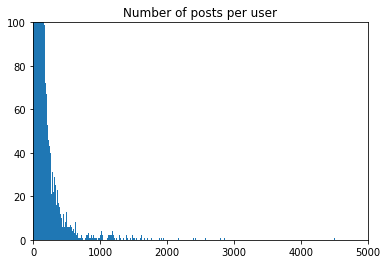

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
posts_per_users = data.user_id.value_counts()
bins = np.arange(posts_per_users.min(), posts_per_users.max(), 10)
plt.ylim([0, 100])
plt.xlim([0, 5000])
plt.hist(posts_per_users,
         bins=bins,
         label='num of posts')


plt.title('Number of posts per user')
plt.show()

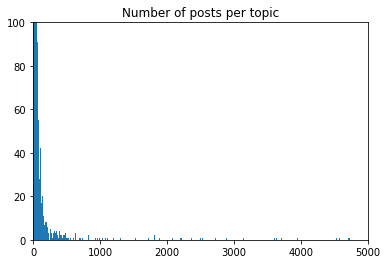

In [48]:
posts_per_topic = data.thread_title.value_counts()
bins = np.arange(posts_per_topic.min(), posts_per_topic.max(), 10)
plt.ylim([0, 100])
plt.xlim([0, 5000])
plt.hist(posts_per_topic,
         bins=bins,
         label='num of posts')


plt.title('Number of posts per topic')
plt.show()

In [54]:
data["hour"] = data["timestamp_rec"].apply(lambda s: s.hour)
users = data.user_id.unique()


34400


In [93]:
miumiu = data.iloc[:30000]
miumiu["type"] = [type(miumiu['timestamp'].iloc[i]) for i in range(len(miumiu))]

/home/asenov/venvs/python3/lib/python3.4/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
miumiu.type.value_counts()
miumiu.head()

,index,post_id,quote,text,thread_title,timestamp,user_id,user_name,prep,lemmas,type
0,0,32975255,NaN,\r\n\t\t\t\t\t\t\tиногда по поиску очень трудн...,тематический сборник по разделу (сводный),2009-10-27 15:13:00,154970.0,iou,иногда по поиску очень трудно найти тему по ин...,иногда по поиск очень трудно находить тема по ...,<class 'datetime.datetime'>
1,1,32975476,32975255.0,\r\n\t\t\t\t\t\t\t1. РОДОРАЗРЕШЕНИЕ (стимуляци...,тематический сборник по разделу (сводный),2009-10-27 15:16:00,154970.0,iou,родоразрешение стимуляция кесарево метод крист...,родоразрешение стимуляция кесарев метод кристе...,<class 'datetime.datetime'>
2,2,32975611,32975255.0,\r\n\t\t\t\t\t\t\t1.4. ОТЧЕТЫ О РОДАХ \n\nчто ...,тематический сборник по разделу (сводный),2009-10-27 15:18:00,154970.0,iou,отчеты о родах что бы я сделала по другому род...,отчет о род что бы я сделать по другой роды оо...,<class 'datetime.datetime'>
3,3,32975745,32975255.0,\r\n\t\t\t\t\t\t\t3. БЕРЕМЕННАЯ ЖИЗНЬ (специфи...,тематический сборник по разделу (сводный),2009-10-27 15:19:00,154970.0,iou,беременная жизнь специфические болячки лекарст...,беременный жизнь специфический болячка лекарст...,<class 'datetime.datetime'>
4,4,32975838,32975255.0,\r\n\t\t\t\t\t\t\t3.6. ПИТАНИЕ И ОБРАЗ ЖИЗНИ\n...,тематический сборник по разделу (сводный),2009-10-27 15:20:00,154970.0,iou,питание и образ жизни прибавка в весе в течени...,питание и образ жизнь прибавка в вес в течение...,<class 'datetime.datetime'>


In [ ]:
for user in users:
    batch = data[data["user_id" == user]]
    num_topics_per_user = len(batch.thread_title.unique())

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
%time pyLDAvis.sklearn.prepare(model, word_count, count_v)

In [234]:
all_files = !ls *.txt
len(all_files)

493

Старая версия

In [228]:
import re
from sklearn.feature_extraction.text import CountVectorizer

def preprocessing():
    import re
    i = 0
    text = []
    with open("7867450.txt", "r", encoding = "utf8") as data:
        for line in data:
            i+=1
            line = re.sub(r'\t', '', line)
            line = re.sub(r'\n', '', line).split(' ')
            if len(line) > 1:
                line = ' '.join(re.findall('[а-я]+',re.sub('ё','e', str(line).lower())))
                text.append(line)

          
        print(len(text))
        print("Number of lines:", i)
        return text          
         

In [74]:
text = preprocessing()

202381
Number of lines: 675529


In [135]:
text = []
with open("data_m.txt", "r", encoding='utf8') as data:
    for line in data:
        line = line = ' '.join(re.findall('[а-я]+',re.sub('ё','e', str(line).lower())))
        text.append(line)

In [139]:
count_v = CountVectorizer()
word_count = count_v.fit_transform(text)
print(word_count.shape)


(4261437, 420068)


In [141]:
sw_df = pd.DataFrame(columns=['stopwords'], data=stop_words)
sw_df.to_csv('sw.csv', index=False)

In [142]:
count_v = CountVectorizer(stop_words = stop_words)
word_count = count_v.fit_transform(text)
print(word_count.shape)

(4261437, 419926)


In [143]:
model = lda.LDA(n_topics=30, n_iter=500, random_state=1)
%time model.fit(word_count)

INFO:lda:n_documents: 4261437
INFO:lda:vocab_size: 419926
INFO:lda:n_words: 38376241
INFO:lda:n_topics: 30
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -530063061
INFO:lda:<10> log likelihood: -427871975
INFO:lda:<20> log likelihood: -389069181
INFO:lda:<30> log likelihood: -375856224
INFO:lda:<40> log likelihood: -370887879
INFO:lda:<50> log likelihood: -368623559
INFO:lda:<60> log likelihood: -367307598
INFO:lda:<70> log likelihood: -366454591
INFO:lda:<80> log likelihood: -365836280
INFO:lda:<90> log likelihood: -365343820
INFO:lda:<100> log likelihood: -365006726
INFO:lda:<110> log likelihood: -364763031
INFO:lda:<120> log likelihood: -364568306
INFO:lda:<130> log likelihood: -364400003
INFO:lda:<140> log likelihood: -364254026
INFO:lda:<150> log likelihood: -364145475
INFO:lda:<160> log likelihood: -364046738
INFO:lda:<170> log likelihood: -363969498
INFO:lda:<180> log likelihood: -363914183
INFO:lda:<190> log likelihood: -363840004
INFO:lda:<200> log likelihood: -363792797
I

CPU times: user 3h 15min 3s, sys: 2.92 s, total: 3h 15min 6s
Wall time: 3h 14min 58s


In [86]:
import glob
print(glob.glob("home/Ks/*.txt"))

[]


In [88]:
import os
for file in os.listdir("/home/Ks/"):
    if file.endswith(".txt"):
        print(os.path.join("/home/Ks/", file))

FileNotFoundError: [Errno 2] No such file or directory: '/home/Ks/'

In [149]:
import pyLDAvis
import pyLDAvis.sklearn

In [ ]:
data = pyLDAvis.sklearn.prepare(model, word_count, count_v)

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.display(data)

,index,post_id,quote,text,thread_title,timestamp,user_id,user_name,prep,lemmas
0,0,32975255,NaN,\r\n\t\t\t\t\t\t\tиногда по поиску очень трудн...,тематический сборник по разделу (сводный),2009-10-27 15:13:00,154970.0,iou,иногда по поиску очень трудно найти тему по ин...,иногда по поиск очень трудно находить тема по ...
1,1,32975476,32975255.0,\r\n\t\t\t\t\t\t\t1. РОДОРАЗРЕШЕНИЕ (стимуляци...,тематический сборник по разделу (сводный),2009-10-27 15:16:00,154970.0,iou,родоразрешение стимуляция кесарево метод крист...,родоразрешение стимуляция кесарев метод кристе...
2,2,32975611,32975255.0,\r\n\t\t\t\t\t\t\t1.4. ОТЧЕТЫ О РОДАХ \n\nчто ...,тематический сборник по разделу (сводный),2009-10-27 15:18:00,154970.0,iou,отчеты о родах что бы я сделала по другому род...,отчет о род что бы я сделать по другой роды оо...
3,3,32975745,32975255.0,\r\n\t\t\t\t\t\t\t3. БЕРЕМЕННАЯ ЖИЗНЬ (специфи...,тематический сборник по разделу (сводный),2009-10-27 15:19:00,154970.0,iou,беременная жизнь специфические болячки лекарст...,беременный жизнь специфический болячка лекарст...
4,4,32975838,32975255.0,\r\n\t\t\t\t\t\t\t3.6. ПИТАНИЕ И ОБРАЗ ЖИЗНИ\n...,тематический сборник по разделу (сводный),2009-10-27 15:20:00,154970.0,iou,питание и образ жизни прибавка в весе в течени...,питание и образ жизнь прибавка в вес в течение...


In [102]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

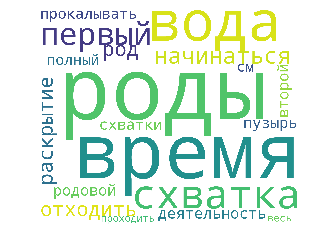

In [112]:
word_string = "первый роды второй роды весь время вода отходить отходить вода родовой деятельность прокалывать пузырь раскрытие см первый род время род схватка начинаться время схватка начинаться схватки полный раскрытие роды проходить"

wordcloud = WordCloud(   stopwords=STOPWORDS,
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

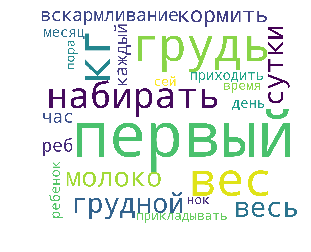

In [111]:
word_string = "первый день молоко приходить первый месяц кормить грудь набирать кг сей пора каждый час прикладывать грудь вес кг первый ребенок грудной вскармливание первый сутки реб нок весь время вес набирать"
wordcloud = WordCloud(   stopwords=STOPWORDS,
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

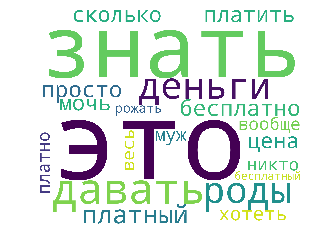

In [110]:
word_string = "это деньги муж рожать бесплатно платить роды просто хотеть платный платно знать весь давать сколько вообще мочь никто цена бесплатный"
wordcloud = WordCloud(   stopwords=STOPWORDS,
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

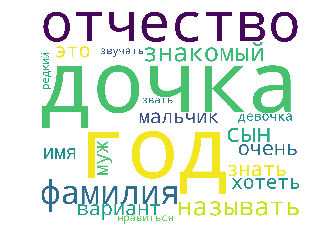

In [109]:
word_string = "имя называть нравиться очень это муж звать отчество фамилия девочка знать сын вариант дочка редкий мальчик знакомый хотеть год звучать"
wordcloud = WordCloud(   stopwords=STOPWORDS,
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()